In [1]:
!pip install superset
!pip install apache-superset

In [5]:
!pip install echarts-python

  Created wheel for echarts-python: filename=echarts_python-0.1.3-py3-none-any.whl size=6475 sha256=f1cf097160bedf29610dca625cd28ea49c45f9e12339a48112e868aadb9e4e94
  Stored in directory: /root/.cache/pip/wheels/eb/ea/8c/e7541cc7459983659772e29e5d2dfedb333d3ada18c3128576
Successfully built echarts-python


In [3]:
!pip install option

In [6]:
!pip install bokeh

In [7]:
import matplotlib.pyplot as plt
import superset as superset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import keras
import csv
import bokeh as bokeh
from matplotlib.colors import LogNorm
import option

from echarts import Echart, Legend, Bar, Axis

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

In [8]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


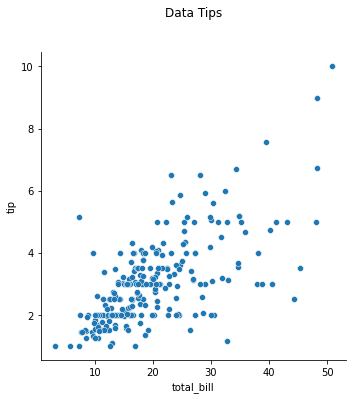

In [9]:
sns.relplot(x="total_bill", y="tip", data=tips).set(title='Data Tips\n\n')

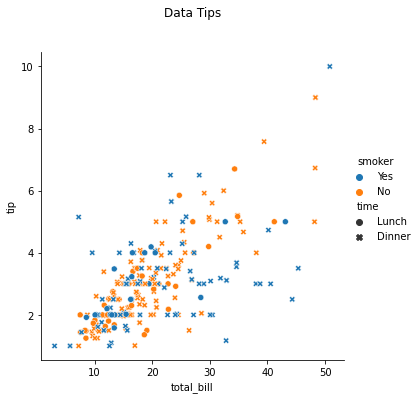

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips).set(title='Data Tips\n\n')

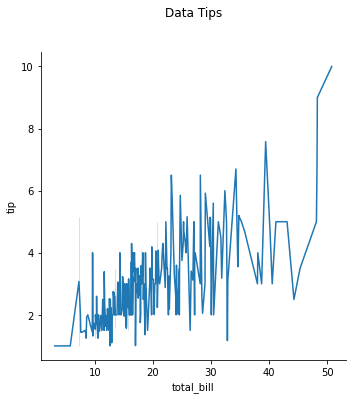

In [11]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips).set(title='Data Tips\n\n')

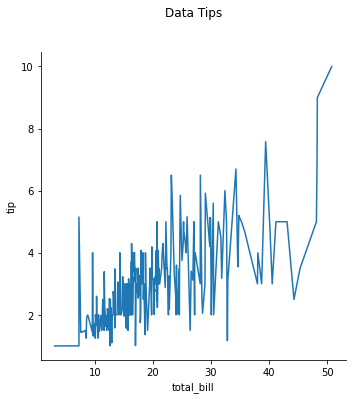

In [12]:
sns.relplot(x="total_bill", y="tip", estimator=None, kind="line", data=tips).set(title='Data Tips\n\n')

plotting with date **data** 

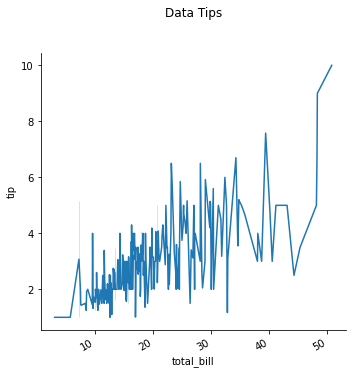

In [13]:
g = sns.relplot(x="total_bill", y="tip", kind="line", data=tips).set(title='Data Tips\n\n')
g.figure.autofmt_xdate()

Plotting subsets of data with semantic mappings

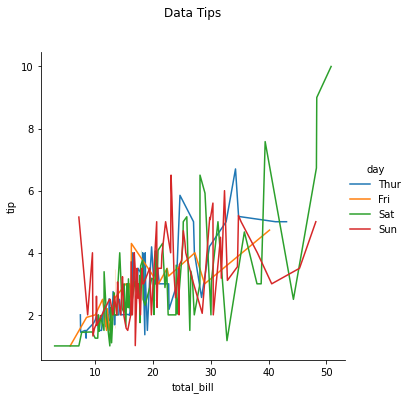

In [14]:
sns.relplot(x="total_bill", y="tip", hue="day", kind="line", data=tips).set(title='Data Tips\n\n')

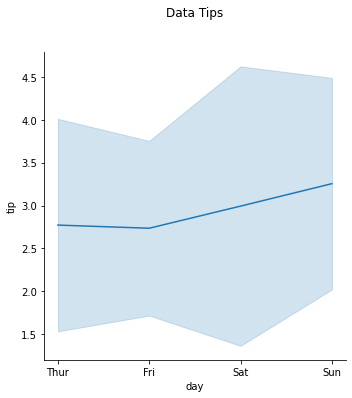

In [15]:
sns.relplot(x="day", y="tip", kind="line", ci="sd", data=tips).set(title='Data Tips\n\n')

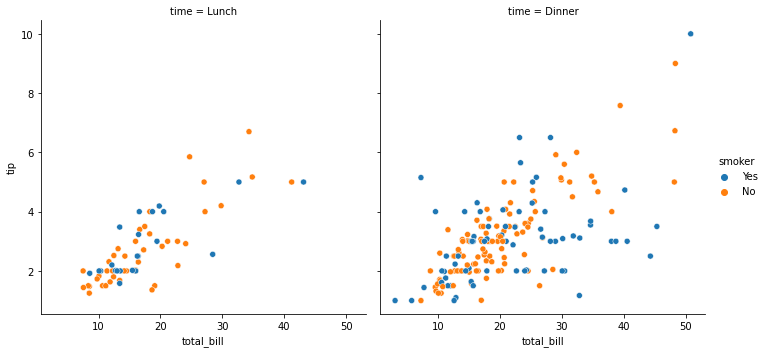

In [16]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

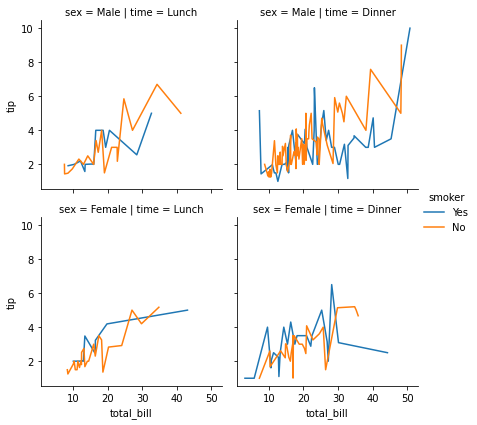

In [17]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", 
            row="sex", height=3, kind="line", estimator=None, data=tips);

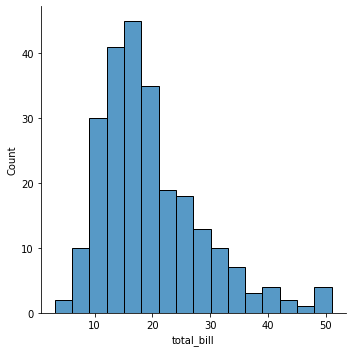

In [18]:
sns.displot(tips, x="total_bill", binwidth=3)

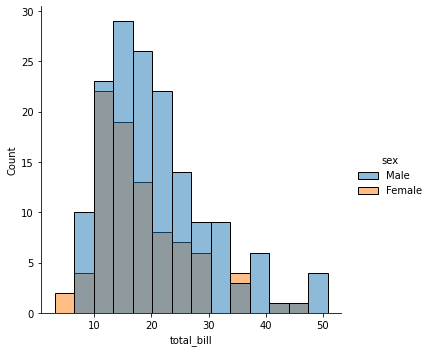

In [19]:
sns.displot(tips, x="total_bill", hue="sex")

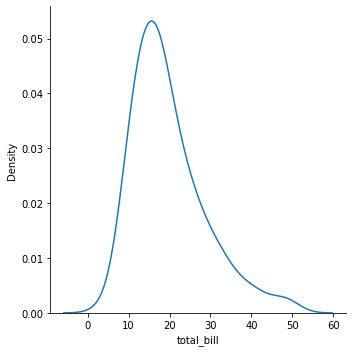

In [20]:
sns.displot(tips, x="total_bill", kind="kde")

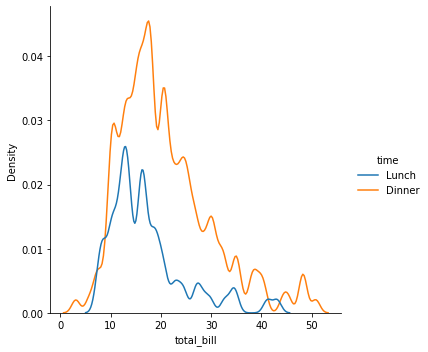

In [21]:
sns.displot(tips, x="total_bill", hue="time", kind="kde", bw_adjust=.25)

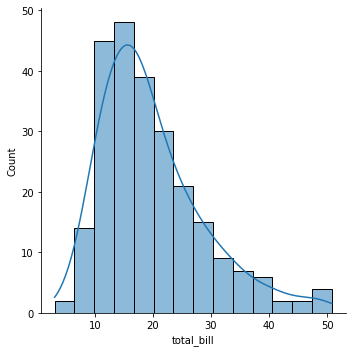

In [22]:
sns.displot(tips, x="total_bill", kde=True)

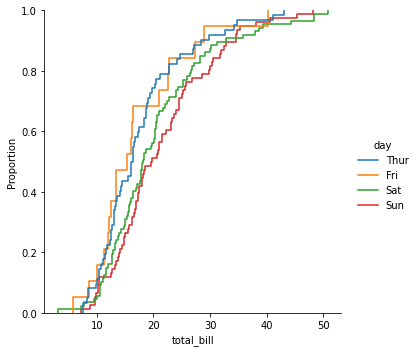

In [23]:
sns.displot(tips, x="total_bill", hue="day", kind="ecdf")

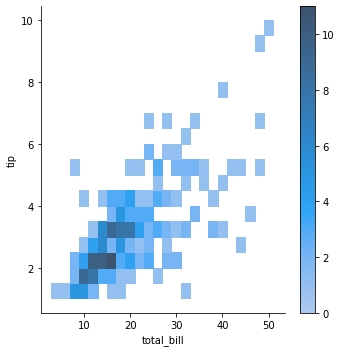

In [24]:
sns.displot(tips, x="total_bill", y="tip", binwidth=(2, .5), cbar=True)

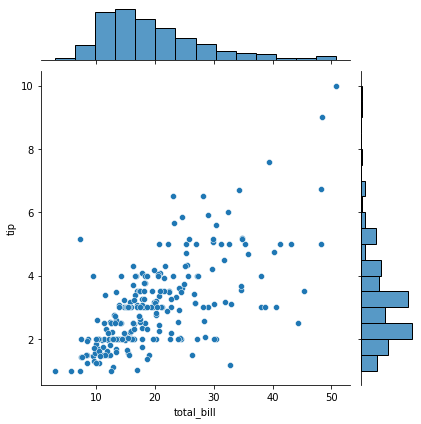

In [25]:
sns.jointplot(data=tips, x="total_bill", y="tip")

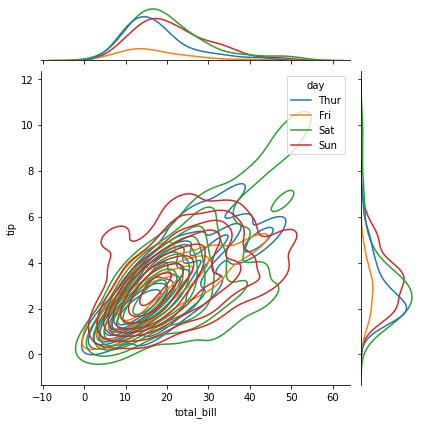

In [26]:
sns.jointplot(
   data=tips, x="total_bill", y="tip", hue="day",
    kind="kde"
)

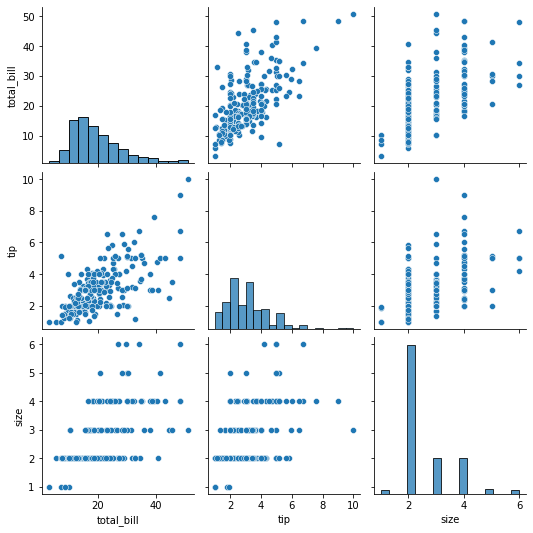

In [27]:
sns.pairplot(tips)

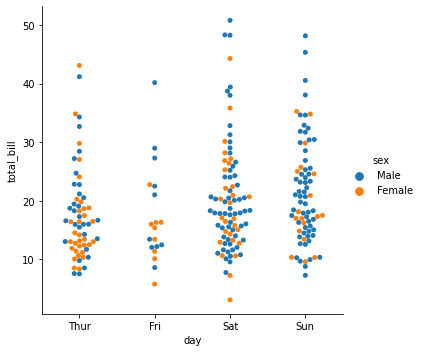

In [28]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)


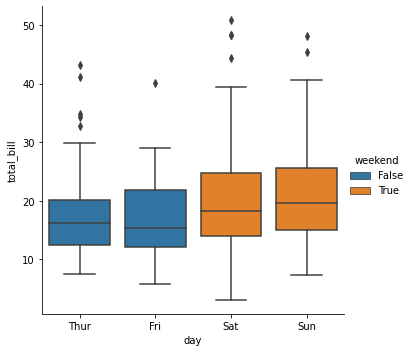

In [29]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

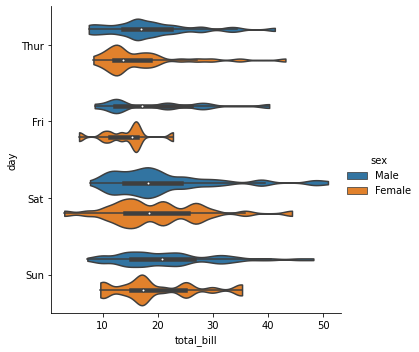

In [30]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

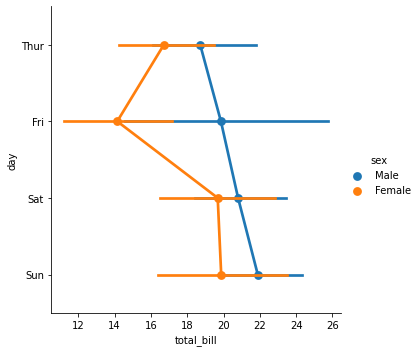

In [31]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="point", data=tips)

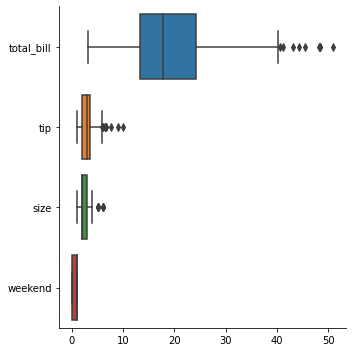

In [32]:
sns.catplot(data=tips, orient="h", kind="box")

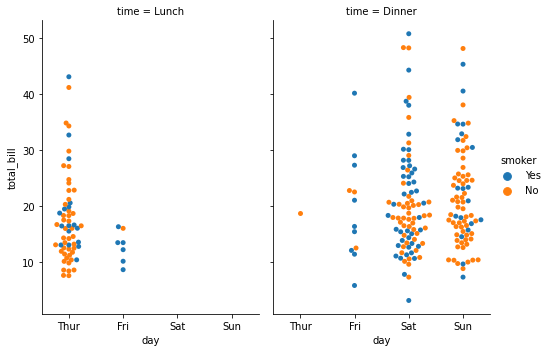

In [33]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.7,
            kind="swarm", data=tips)

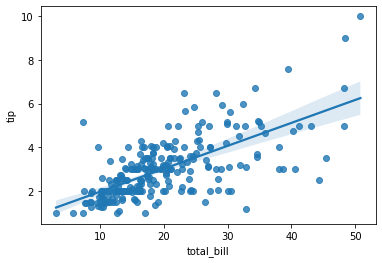

In [34]:
sns.regplot(x="total_bill", y="tip", data=tips);

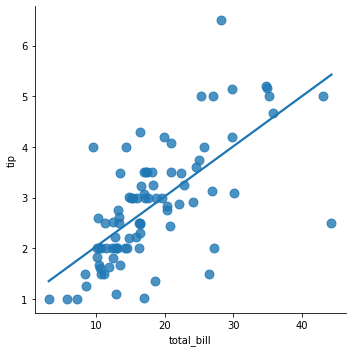

In [35]:
sns.lmplot(x="total_bill", y="tip", data=tips.query("sex == 'Female'"),
           ci=None, scatter_kws={"s": 80});

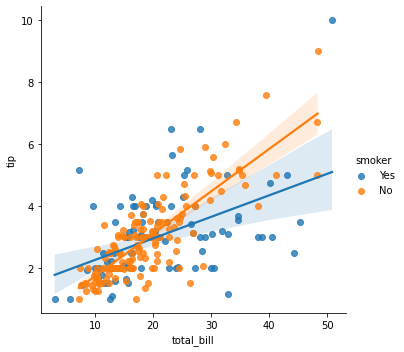

In [36]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

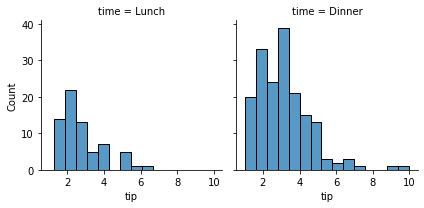

In [37]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

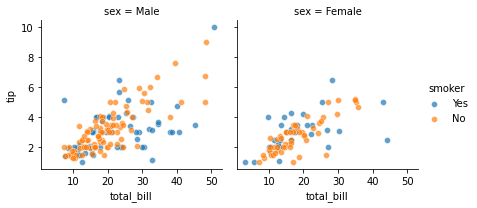

In [38]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

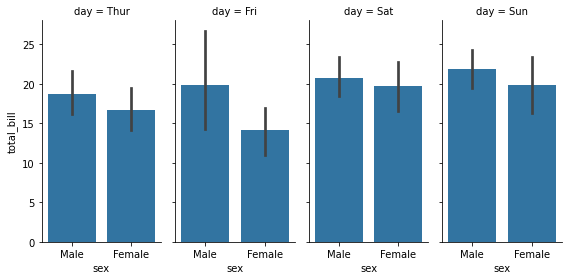

In [39]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

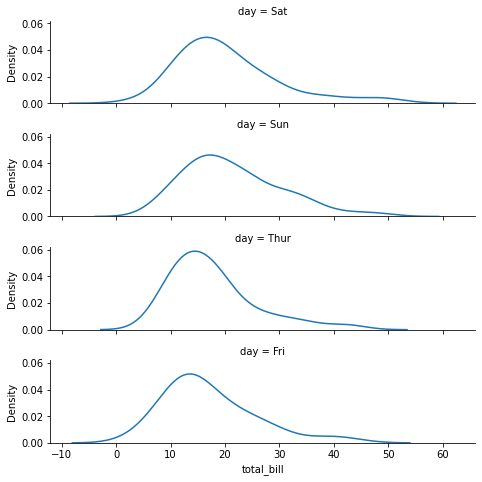

In [40]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")

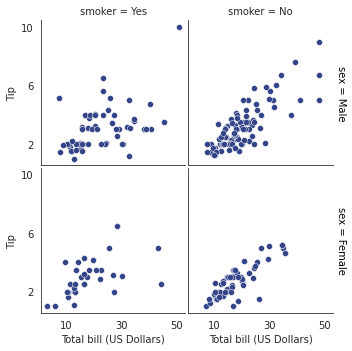

In [41]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

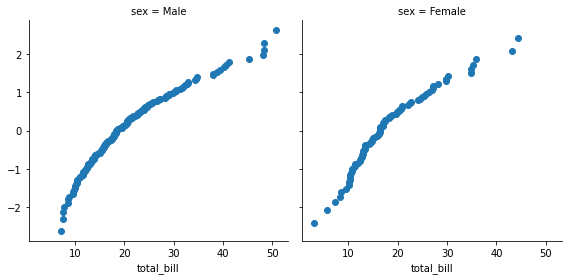

In [42]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

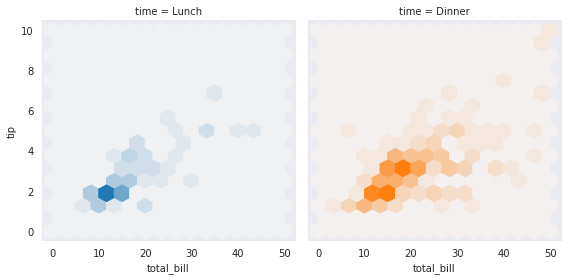

In [43]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


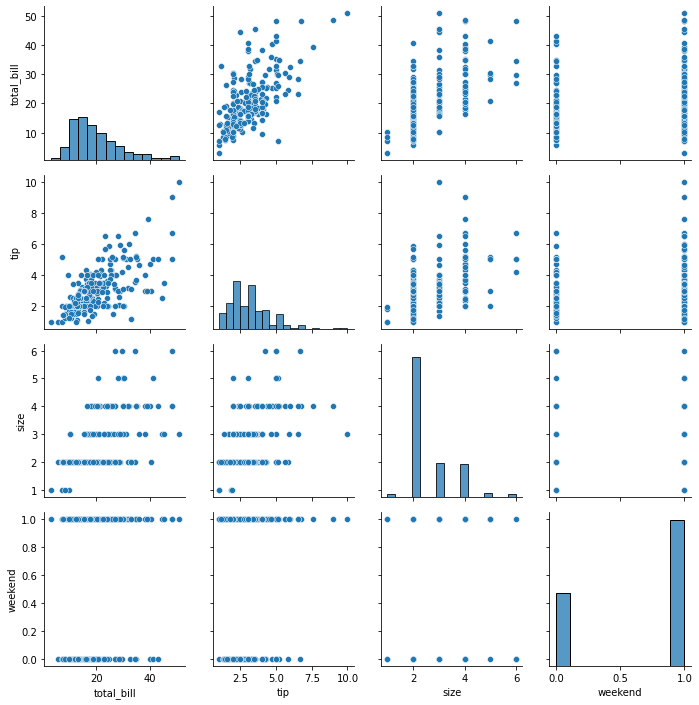

In [44]:
g = sns.PairGrid(tips)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)